## Hyperparameters
When we define the model, we can specify the hyperparameters. As we've seen in this section, the most common ones are

- C: The C parameter.

- kernel: The kernel. The most common ones are 'linear', 'poly', and 'rbf'.

- degree: If the kernel is polynomial, this is the maximum degree of the monomials in the kernel.

- gamma : If the kernel is rbf, this is the gamma parameter.

For example,

 - here we define a model with a polynomial kernel of degree 4, and a C parameter of 0.1.
         >>> model = SVC(kernel='poly', degree=4, C=0.1)

In [39]:
# Import statements 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Read the data.
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Best Parameters
parameters = {'kernel':['poly','rbf'], 'gamma':[0.1,10,20,30]}
grid_obj = GridSearchCV(model, parameters, scoring=make_scorer(accuracy_score))
grid_fit = grid_obj.fit(X, y)
best_clf = grid_fit.best_estimator_
best_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
# Find the right parameters for this model to achieve 100% accuracy on the dataset.
model = SVC(kernel='rbf', gamma=30)

# TODO: Fit the model.
model.fit(X,y)
# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y,y_pred)
acc

1.0

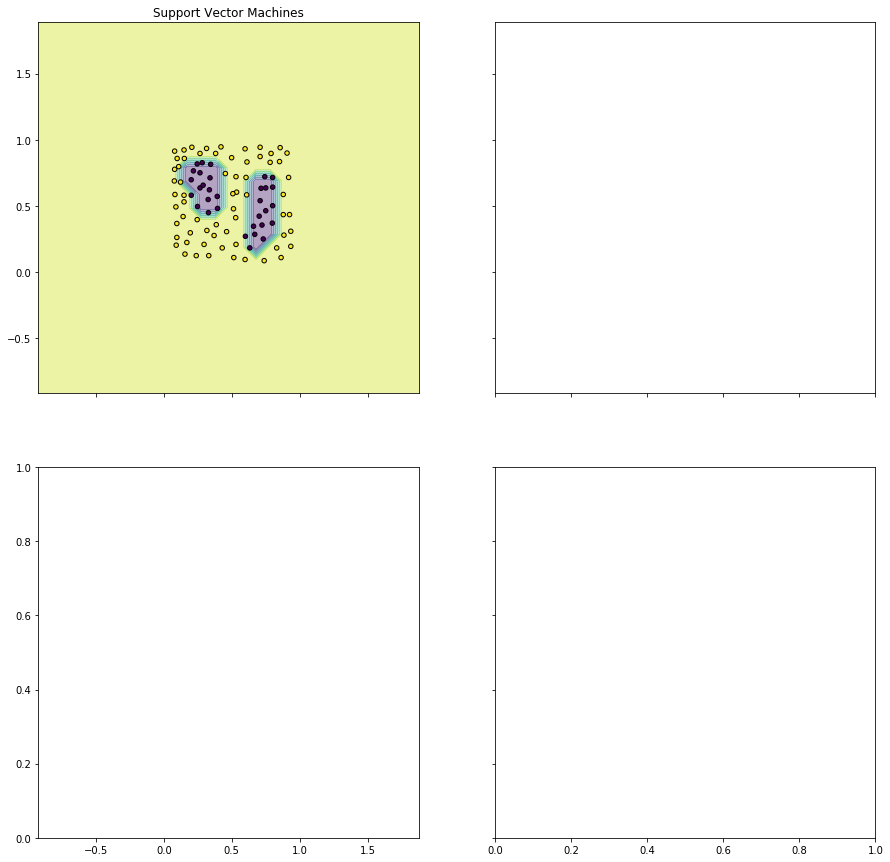

In [41]:
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings("ignore")

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(15,15))

for idx, clf, tt in zip(product([0, 1], [0, 1]),[model],['Support Vector Machines']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()